> 판다스-- 새로운 열의 할당(2), 자료분석--FIFA23 데이터분석, 판다스-- Groupby 

# 강의영상 

<https://youtube.com/playlist?list=PLQqh36zP38-wOd-atBIouN7KjEBqTWy1r>

# imports

In [1]:
# !pip install pandas_profiling

In [2]:
import pandas as pd
import numpy as np
import pandas_profiling
from plotnine import *

# 판다스: 새로운 열의 할당 2단계 (연쇄할당) 

## 모티브 

`-` 원본데이터를 가급적 손상시키지 않으면서 데이터를 변형하고 싶음. 

In [3]:
df = pd.DataFrame({'A':range(0,5),'B':range(1,6)})
df

,A,B
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5


복사본 생성 

In [4]:
df2 = df 
df2

,A,B
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5


In [5]:
df2['C'] = (df2.A+ df2.B)/2
df2

,A,B,C
0,0,1,0.5
1,1,2,1.5
2,2,3,2.5
3,3,4,3.5
4,4,5,4.5


In [6]:
df2['D']= (df2.C - np.mean(df2.C))/np.std(df2.C) 
df2

,A,B,C,D
0,0,1,0.5,-1.414214
1,1,2,1.5,-0.707107
2,2,3,2.5,0.000000
3,3,4,3.5,0.707107
4,4,5,4.5,1.414214


In [7]:
df # 니가 왜 거기서 나와??

,A,B,C,D
0,0,1,0.5,-1.414214
1,1,2,1.5,-0.707107
2,2,3,2.5,0.000000
3,3,4,3.5,0.707107
4,4,5,4.5,1.414214


## 해결책1: df.copy()이용, .eval()이용

`-` 올바른코드1

In [8]:
df = pd.DataFrame({'A':range(0,5),'B':range(1,6)})
df2 = df.copy() 
df2['C'] = (df2.A+ df2.B)/2
df2['D']= (df2.C - np.mean(df2.C))/np.std(df2.C) 

In [9]:
df2

,A,B,C,D
0,0,1,0.5,-1.414214
1,1,2,1.5,-0.707107
2,2,3,2.5,0.000000
3,3,4,3.5,0.707107
4,4,5,4.5,1.414214


In [10]:
df

,A,B
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5


`-` 올바른코드2

In [30]:
df = pd.DataFrame({'A':range(0,5),'B':range(1,6)})
mean = np.mean 
std = np.std 
df.eval('C=(A+B)/2').eval('D=(C-@mean(C))/@std(C)')

,A,B,C,D
0,0,1,0.5,-1.414214
1,1,2,1.5,-0.707107
2,2,3,2.5,0.000000
3,3,4,3.5,0.707107
4,4,5,4.5,1.414214


- 어디까지 eval expression 안에서 지원되는지 명확하지 않고
- 외부에 함수를 선언하고 eval expression 안에 @를 붙이는게 좀 귀찮음 

`-` 올바른코드3 (assign) --> 실패

In [31]:
df = pd.DataFrame({'A':range(0,5),'B':range(1,6)})
df.assign(C= (df.A+df.B)/2) 

,A,B,C
0,0,1,0.5
1,1,2,1.5
2,2,3,2.5
3,3,4,3.5
4,4,5,4.5


In [32]:
df.assign(C= (df.A+df.B)/2).assign(D= (df.C- np.mean(df.C))/np.std(df.C))

AttributeError: 'DataFrame' object has no attribute 'C'

아래와 같이 고쳐야함 

In [39]:
_df = df.assign(C= (df.A+df.B)/2)
_df.assign(D= (_df.C- np.mean(_df.C))/np.std(_df.C))

,A,B,C,D
0,0,1,0.5,-1.414214
1,1,2,1.5,-0.707107
2,2,3,2.5,0.000000
3,3,4,3.5,0.707107
4,4,5,4.5,1.414214


- 이건 우리의 철학이랑 안맞음.. 

## 해결책2: assign을 이용한 연쇄할당  

실패한코드는 아래와 같다. 

In [44]:
df.assign(C= (df.A+df.B)/2).assign(D= (df.C- np.mean(df.C))/np.std(df.C))

AttributeError: 'DataFrame' object has no attribute 'C'

두번째 assign에서 표현된 df.C 에서, df가 `current df` (= `df.assign(C= (df.A+df.B)/2)` 까지 연산된 상태) 를 의미하도록 만들고 싶다. $\to$ 아래와 같이 `lambda df:` 를 추가하면 된다. 

In [49]:
df.assign(C= (df.A+df.B)/2).assign(D= lambda df: (df.C- np.mean(df.C))/np.std(df.C))

,A,B,C,D
0,0,1,0.5,-1.414214
1,1,2,1.5,-0.707107
2,2,3,2.5,0.000000
3,3,4,3.5,0.707107
4,4,5,4.5,1.414214


`-` 연쇄할당 

In [55]:
df.assign(C = (df.A+df.B)/2).assign(D = lambda df: df.C +2).assign(E = lambda df: df.D - 2)

,A,B,C,D,E
0,0,1,0.5,2.5,0.5
1,1,2,1.5,3.5,1.5
2,2,3,2.5,4.5,2.5
3,3,4,3.5,5.5,3.5
4,4,5,4.5,6.5,4.5


# FIFA23 데이터분석

## FIFA23 data 

`-` FIFA23라는 축구게임이 있음 

`-` 게임에 실제 선수들이 나오면서 선수들의 능력치가 세밀하게 구현되어 있음 

`-` 선수들 능력치에 대한 데이터셋은 캐글에 공개되어 있음 
- https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database?select=FIFA23_official_data.csv

## 데이터살펴보기 

`-` 일단 살펴보기

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN


트랜스포즈하여 보는 것이 편할때도 있음 

In [4]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,17650,17651,17652,17653,17654,17655,17656,17657,17658,17659
ID,209658,212198,224334,192985,224232,212622,197445,187961,208333,210514,...,256879,269546,267647,253186,267461,269526,267946,270567,256624,256376
Name,L. Goretzka,Bruno Fernandes,M. Acuña,K. De Bruyne,N. Barella,J. Kimmich,D. Alaba,22 Paulinho,E. Can,João Cancelo,...,22 G. Leijon,Wu Fei,22 E. Grosz,22 S. Booth,22 L. Grimpe,Deng Xiongtao,22 Lim Jun Sub,A. Demir,21 S. Czajor,21 F. Jakobsson
Age,27,27,30,31,25,27,30,32,28,28,...,19,32,18,20,17,19,17,25,18,20
Photo,https://cdn.sofifa.net/players/209/658/23_60.png,https://cdn.sofifa.net/players/212/198/23_60.png,https://cdn.sofifa.net/players/224/334/23_60.png,https://cdn.sofifa.net/players/192/985/23_60.png,https://cdn.sofifa.net/players/224/232/23_60.png,https://cdn.sofifa.net/players/212/622/23_60.png,https://cdn.sofifa.net/players/197/445/23_60.png,https://cdn.sofifa.net/players/187/961/22_60.png,https://cdn.sofifa.net/players/208/333/23_60.png,https://cdn.sofifa.net/players/210/514/23_60.png,...,https://cdn.sofifa.net/players/256/879/22_60.png,https://cdn.sofifa.net/players/269/546/23_60.png,https://cdn.sofifa.net/players/267/647/22_60.png,https://cdn.sofifa.net/players/253/186/22_60.png,https://cdn.sofifa.net/players/267/461/22_60.png,https://cdn.sofifa.net/players/269/526/23_60.png,https://cdn.sofifa.net/players/267/946/22_60.png,https://cdn.sofifa.net/players/270/567/23_60.png,https://cdn.sofifa.net/players/256/624/21_60.png,https://cdn.sofifa.net/players/256/376/21_60.png
Nationality,Germany,Portugal,Argentina,Belgium,Italy,Germany,Austria,Brazil,Germany,Portugal,...,Sweden,China PR,Romania,England,Germany,China PR,Korea Republic,Turkey,Poland,Sweden
Flag,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/pt.png,https://cdn.sofifa.net/flags/ar.png,https://cdn.sofifa.net/flags/be.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/at.png,https://cdn.sofifa.net/flags/br.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/pt.png,...,https://cdn.sofifa.net/flags/se.png,https://cdn.sofifa.net/flags/cn.png,https://cdn.sofifa.net/flags/ro.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/cn.png,https://cdn.sofifa.net/flags/kr.png,https://cdn.sofifa.net/flags/tr.png,https://cdn.sofifa.net/flags/pl.png,https://cdn.sofifa.net/flags/se.png
Overall,87,86,85,91,86,89,86,83,82,88,...,52,51,52,51,54,48,48,51,50,50
Potential,88,87,85,91,89,90,86,83,82,88,...,62,51,70,60,68,61,64,56,65,61
Club,FC Bayern München,Manchester United,Sevilla FC,Manchester City,Inter,FC Bayern München,Real Madrid CF,Al Ahli,Borussia Dortmund,Manchester City,...,Örebro SK,Wuhan Three Towns,Gaz Metan Mediaş,Crewe Alexandra,RB Leipzig,Meizhou Hakka,Jeju United FC,Ümraniyespor,Fleetwood Town,IFK Norrköping
Club Logo,https://cdn.sofifa.net/teams/21/30.png,https://cdn.sofifa.net/teams/11/30.png,https://cdn.sofifa.net/teams/481/30.png,https://cdn.sofifa.net/teams/10/30.png,https://cdn.sofifa.net/teams/44/30.png,https://cdn.sofifa.net/teams/21/30.png,https://cdn.sofifa.net/teams/243/30.png,https://cdn.sofifa.net/teams/112387/30.png,https://cdn.sofifa.net/teams/22/30.png,https://cdn.sofifa.net/teams/10/30.png,...,https://cdn.sofifa.net/teams/705/30.png,https://cdn.sofifa.net/teams/116361/30.png,https://cdn.sofifa.net/teams/112637/30.png,https://cdn.sofifa.net/teams/121/30.png,https://cdn.sofifa.net/teams/112172/30.png,https://cdn.sofifa.net/teams/114628/30.png,https://cdn.sofifa.net/teams/1478/30.png,https://cdn.sofifa.net/teams/113796/30.png,https://cdn.sofifa.net/teams/112260/30.png,https://cdn.sofifa.net/teams/702/30.png


`-` column이름조사 

In [5]:
df.keys()

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'Release Clause', 'Kit Number', 'Best Overall Rating'],
      dtype='object')

- 이름에 space가 있어서 좀 거슬림

`-` 각 column 별로 자료형조사

In [6]:
pd.DataFrame({'colname':df.keys(), 'dtype':[df[key].dtype for key in df.keys()]})

,colname,dtype
0,ID,int64
1,Name,object
2,Age,int64
3,Photo,object
4,Nationality,object
5,Flag,object
6,Overall,int64
7,Potential,int64
8,Club,object
9,Club Logo,object


`-` 결측치조사 

In [7]:
pd.DataFrame({'colname':df.keys(), 
              'dtype':[df[key].dtype for key in df.keys()],
              'na':[df[key].isna().sum() for key in df.keys()]
             })

,colname,dtype,na
0,ID,int64,0
1,Name,object,0
2,Age,int64,0
3,Photo,object,0
4,Nationality,object,0
5,Flag,object,0
6,Overall,int64,0
7,Potential,int64,0
8,Club,object,211
9,Club Logo,object,0


(퀴즈) 열의선택: 결측치가 10000개 이상인 열을 보고싶다면? 

In [8]:
df.loc[:,[df[key].isna().sum()>10000 for key in df.keys()]]

,Loaned From,Best Overall Rating
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
17655,NaN,NaN
17656,NaN,NaN
17657,NaN,NaN
17658,NaN,NaN


`-` .info()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17660 non-null  int64  
 1   Name                      17660 non-null  object 
 2   Age                       17660 non-null  int64  
 3   Photo                     17660 non-null  object 
 4   Nationality               17660 non-null  object 
 5   Flag                      17660 non-null  object 
 6   Overall                   17660 non-null  int64  
 7   Potential                 17660 non-null  int64  
 8   Club                      17449 non-null  object 
 9   Club Logo                 17660 non-null  object 
 10  Value                     17660 non-null  object 
 11  Wage                      17660 non-null  object 
 12  Special                   17660 non-null  int64  
 13  Preferred Foot            17660 non-null  object 
 14  Intern

`-` .describe(): 숫자들이 저장된 column에 대하여 기본통계량 조사

In [10]:
df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Kit Number
count,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17625.000000
mean,246319.424462,23.127746,63.369592,70.981200,1537.915855,1.106285,2.900340,2.297169,25.037957
std,31487.892861,4.639821,8.036268,6.529836,285.893809,0.407021,0.663523,0.754264,19.154116
min,16.000000,15.000000,43.000000,42.000000,749.000000,1.000000,1.000000,1.000000,1.000000
25%,240732.500000,20.000000,58.000000,67.000000,1387.000000,1.000000,3.000000,2.000000,11.000000
50%,257041.000000,22.000000,63.000000,71.000000,1548.000000,1.000000,3.000000,2.000000,22.000000
75%,263027.500000,26.000000,69.000000,75.000000,1727.000000,1.000000,3.000000,3.000000,32.000000
max,271340.000000,54.000000,91.000000,95.000000,2312.000000,5.000000,5.000000,5.000000,99.000000


`-` pandas_profiling.ProfileReport()을 이용한 전체적인 조사 

In [15]:
# pandas_profiling.ProfileReport(df).to_file('fifa2023_reprot.html')

`-` 특정열을 중심으로 정렬하여 보기 

In [16]:
df.sort_values(by='Overall',ascending=False).reset_index()

,index,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,41,188545,R. Lewandowski,33,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,91,91,FC Barcelona,...,Yes,"<span class=""pos pos25"">ST","Jul 18, 2022",NaN,2025,185cm,81kg,€172.2M,9.0,NaN
1,124,165153,K. Benzema,34,https://cdn.sofifa.net/players/165/153/23_60.png,France,https://cdn.sofifa.net/flags/fr.png,91,91,Real Madrid CF,...,Yes,"<span class=""pos pos21"">CF","Jul 9, 2009",NaN,2023,185cm,81kg,€131.2M,9.0,NaN
2,3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
3,56,158023,L. Messi,35,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,91,91,Paris Saint-Germain,...,Yes,"<span class=""pos pos23"">RW","Aug 10, 2021",NaN,2023,169cm,67kg,€99.9M,30.0,NaN
4,75,231747,K. Mbappé,23,https://cdn.sofifa.net/players/231/747/23_60.png,France,https://cdn.sofifa.net/flags/fr.png,91,95,Paris Saint-Germain,...,Yes,"<span class=""pos pos25"">ST","Jul 1, 2018",NaN,2025,182cm,73kg,€366.7M,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,15513,266751,22 Jung Ho Yeon,20,https://cdn.sofifa.net/players/266/751/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,45,53,GwangJu FC,...,No,"<span class=""pos pos29"">RES","Jan 20, 2022",NaN,2026,180cm,73kg,€145K,23.0,NaN
17656,16215,268279,22 J. Looschen,24,https://cdn.sofifa.net/players/268/279/22_60.png,Germany,https://cdn.sofifa.net/flags/de.png,44,47,SV Meppen,...,No,"<span class=""pos pos29"">RES","Mar 19, 2022",NaN,2026,178cm,78kg,€92K,42.0,NaN
17657,16042,255283,20 Kim Yeong Geun,22,https://cdn.sofifa.net/players/255/283/20_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,44,49,Gyeongnam FC,...,No,"<span class=""pos pos29"">RES","Jan 9, 2020",NaN,2020,174cm,71kg,€53K,43.0,NaN
17658,14634,269038,22 Zhang Wenxuan,16,https://cdn.sofifa.net/players/269/038/22_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,44,59,Guangzhou FC,...,No,"<span class=""pos pos29"">RES","May 1, 2022",NaN,2022,175cm,70kg,€239K,29.0,NaN


`-` 특정열을 중심으로 그룹화하여 보기 ($\star$)

In [17]:
df.Nationality.unique() # 데이터셋에 포함된 나라들 출력

array(['Germany', 'Portugal', 'Argentina', 'Belgium', 'Italy', 'Austria',
       'Brazil', 'Croatia', 'Serbia', 'Spain', 'Netherlands', 'France',
       'Colombia', 'England', 'Uruguay', 'Morocco', 'Egypt', 'Algeria',
       'Ukraine', 'United States', "Côte d'Ivoire", 'Poland', 'Chile',
       'Senegal', 'Central African Republic', 'Denmark', 'Nigeria',
       'Mexico', 'Turkey', 'Canada', 'Wales', 'Scotland', 'Romania',
       'Czech Republic', 'Ghana', 'Korea Republic',
       'Bosnia and Herzegovina', 'Mali', 'Slovakia', 'Armenia', 'Norway',
       'Switzerland', 'Cameroon', 'Peru', 'Jamaica', 'Zambia', 'Guinea',
       'Sweden', 'North Macedonia', 'Russia', 'Tunisia', 'Malta',
       'Angola', 'Republic of Ireland', 'Ecuador', 'Benin', 'Paraguay',
       'Montenegro', 'Australia', 'Comoros', 'Gabon', 'Iceland',
       'Slovenia', 'Japan', 'Israel', 'China PR', 'Venezuela', 'Liberia',
       'Greece', 'Bulgaria', 'Honduras', 'Saudi Arabia', 'Curacao',
       'Northern Ireland', 'Gu

In [18]:
df.groupby(by='Nationality')[['Overall']].agg({np.mean,len}).sort_values(('Overall', 'mean'),ascending=False)

Overall     
                            mean  len
Nationality                          
Philippines            74.000000    1
Namibia                72.000000    1
Mozambique             72.000000    2
Kuwait                 71.000000    1
Brazil                 70.556586  539
...                          ...  ...
San Marino             53.000000    1
China PR               52.230769  325
South Sudan            52.000000    5
India                  51.994681  188
Saint Kitts and Nevis  51.000000    1

[161 rows x 2 columns]

- groupby는 나중에 다시 설명 합니다. 

## 데이터정리하기

`-` 칼럼이름변경

In [19]:
df.set_axis(pd.Index(map(lambda x: x.replace(' ','_'), df.columns)), axis=1)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club_Logo,...,Real_Face,Position,Joined,Loaned_From,Contract_Valid_Until,Height,Weight,Release_Clause,Kit_Number,Best_Overall_Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,No,"<span class=""pos pos29"">RES","Apr 11, 2022",NaN,2027,190cm,78kg,€218K,35.0,NaN
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2022",NaN,2026,195cm,84kg,€188K,21.0,NaN
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,No,"<span class=""pos pos29"">RES","Jun 6, 2021",NaN,2023,190cm,82kg,€142K,12.0,NaN
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2020",NaN,2021,187cm,79kg,€214K,40.0,NaN


`-` 결측치제거 

In [20]:
df.drop(columns=['Loaned From', 'Best Overall Rating']).dropna()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Kit Number
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,High/ Medium,Unique,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",2026,189cm,82kg,€157M,8.0
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,High/ High,Unique,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",2026,179cm,69kg,€155M,8.0
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB","Sep 14, 2020",2024,172cm,69kg,€97.7M,19.0
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",2025,181cm,70kg,€198.9M,17.0
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,High/ High,Normal (170-),Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",2026,172cm,68kg,€154.4M,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,Medium/ Medium,Normal (185+),No,"<span class=""pos pos29"">RES","Apr 11, 2022",2027,190cm,78kg,€218K,35.0
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,Medium/ Medium,Lean (185+),No,"<span class=""pos pos29"">RES","Jan 1, 2022",2026,195cm,84kg,€188K,21.0
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,Medium/ Medium,Lean (185+),No,"<span class=""pos pos29"">RES","Jun 6, 2021",2023,190cm,82kg,€142K,12.0
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,Medium/ Medium,Normal (185+),No,"<span class=""pos pos29"">RES","Jan 1, 2020",2021,187cm,79kg,€214K,40.0


`-` Height, Weight의 자료형을 float형으로 수정하기 

In [21]:
df.assign(
    Height= list(map(lambda x: float(x[:-2]), df.Height)),
    Weight= list(map(lambda x: float(x[:-2]), df.Weight))
)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189.0,82.0,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179.0,69.0,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172.0,69.0,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181.0,70.0,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172.0,68.0,€154.4M,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,No,"<span class=""pos pos29"">RES","Apr 11, 2022",NaN,2027,190.0,78.0,€218K,35.0,NaN
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2022",NaN,2026,195.0,84.0,€188K,21.0,NaN
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,No,"<span class=""pos pos29"">RES","Jun 6, 2021",NaN,2023,190.0,82.0,€142K,12.0,NaN
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2020",NaN,2021,187.0,79.0,€214K,40.0,NaN


`-` Release Clause의 자료형을 float으로 수정하기 

In [22]:
df['Release Clause']

0          €157M
1          €155M
2         €97.7M
3        €198.9M
4        €154.4M
          ...   
17655      €218K
17656      €188K
17657      €142K
17658      €214K
17659      €131K
Name: Release Clause, Length: 17660, dtype: object

In [23]:
_f = lambda x: float(x[1:-1])*1000 if x[-1]=='K' else float(x[1:-1])*1000000

In [24]:
_f('€157M')

157000000.0

In [25]:
_f('€131K')

131000.0

(시도1--실패)

In [26]:
list(map(_f,df['Release Clause']))

TypeError: 'float' object is not subscriptable

(시도1이 실패한 이유)

In [27]:
df['Release Clause'].isna().sum() # 이 column에는 1151개의 결측치가 존재

1151

(nan에 대한 예비학습)

In [28]:
df.loc[df['Release Clause'].isna(), 'Release Clause']

18       NaN
34       NaN
38       NaN
49       NaN
50       NaN
        ... 
17378    NaN
17386    NaN
17535    NaN
17590    NaN
17618    NaN
Name: Release Clause, Length: 1151, dtype: object

In [29]:
df.loc[18, 'Release Clause']

nan

In [30]:
pd.isna(df.loc[18, 'Release Clause'])

True

In [31]:
type(df.loc[18, 'Release Clause'])

float

In [32]:
df.loc[18, 'Release Clause'][-1]

TypeError: 'float' object is not subscriptable

(시도2--성공)

In [33]:
df.rename(columns={'Release Clause':'ReleaseClause'})\
.assign(ReleaseClause = list(map(lambda x: _f(x) if pd.isna(x)==False else x , df['Release Clause'])))\
.rename(columns={'ReleaseClause':'Release Clause'})

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,157000000.0,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,155000000.0,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,97700000.0,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,198900000.0,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,154400000.0,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,No,"<span class=""pos pos29"">RES","Apr 11, 2022",NaN,2027,190cm,78kg,218000.0,35.0,NaN
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2022",NaN,2026,195cm,84kg,188000.0,21.0,NaN
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,No,"<span class=""pos pos29"">RES","Jun 6, 2021",NaN,2023,190cm,82kg,142000.0,12.0,NaN
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2020",NaN,2021,187cm,79kg,214000.0,40.0,NaN


(시도3--성공) 그냥 결측치를 제거하고 변형해도 무방.. 

In [34]:
df2 = df.drop(columns=['Loaned From', 'Best Overall Rating']).dropna()
df2['Release Clause'] = list(map(lambda x: _f(x) if pd.isna(x)==False else x , df2['Release Clause']))
df2

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Kit Number
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,High/ Medium,Unique,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",2026,189cm,82kg,157000000.0,8.0
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,High/ High,Unique,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",2026,179cm,69kg,155000000.0,8.0
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB","Sep 14, 2020",2024,172cm,69kg,97700000.0,19.0
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",2025,181cm,70kg,198900000.0,17.0
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,High/ High,Normal (170-),Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",2026,172cm,68kg,154400000.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,Medium/ Medium,Normal (185+),No,"<span class=""pos pos29"">RES","Apr 11, 2022",2027,190cm,78kg,218000.0,35.0
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,Medium/ Medium,Lean (185+),No,"<span class=""pos pos29"">RES","Jan 1, 2022",2026,195cm,84kg,188000.0,21.0
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,Medium/ Medium,Lean (185+),No,"<span class=""pos pos29"">RES","Jun 6, 2021",2023,190cm,82kg,142000.0,12.0
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,Medium/ Medium,Normal (185+),No,"<span class=""pos pos29"">RES","Jan 1, 2020",2021,187cm,79kg,214000.0,40.0


> 분석의 편의를 위하여 (1) colnames를 변경하고 (2) 결측치를 제거하고 (3) 몇 가지 전 처리를 추가로 진행한 뒤 df2를 만들어서 분석하는게 좋음  

## 데이터분석+시각화

`-` Overall vs Potential 

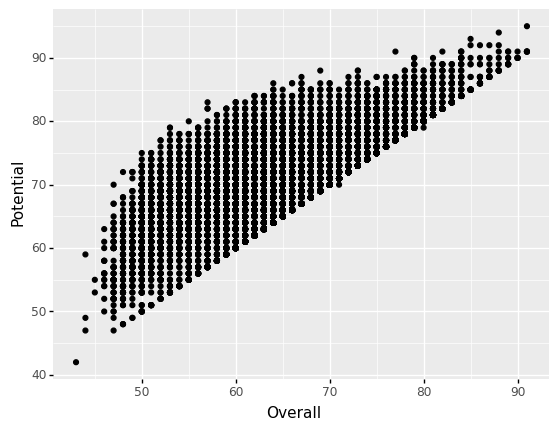

<ggplot: (8772275859669)>

In [35]:
ggplot(data=df) + geom_point(aes(x='Overall',y='Potential'))

- 뭔가 Potential > Overall 인 관계가 성립하는 듯 하다. $\to$ 우리가 생각하는 포텐셜의 의미는 사실 Potential2 = Potential - Overall 에 더 가깝다. $\to$  Potential2 = Potential - Overall 인 변수를 새로 만들고 시각화 해보자. 

`-` Potential2 = Potential - Overall 를 계산하여 새로운 열을 추가하자. 

In [36]:
df.eval('Potential2 = Potential - Overall')

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating,Potential2
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN,1
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN,1
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN,0
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN,0
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,"<span class=""pos pos29"">RES","Apr 11, 2022",NaN,2027,190cm,78kg,€218K,35.0,NaN,13
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,"<span class=""pos pos29"">RES","Jan 1, 2022",NaN,2026,195cm,84kg,€188K,21.0,NaN,16
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,"<span class=""pos pos29"">RES","Jun 6, 2021",NaN,2023,190cm,82kg,€142K,12.0,NaN,5
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,"<span class=""pos pos29"">RES","Jan 1, 2020",NaN,2021,187cm,79kg,€214K,40.0,NaN,15


`-` 수정된 데이터프레임으로 다시 시각화를 하자.

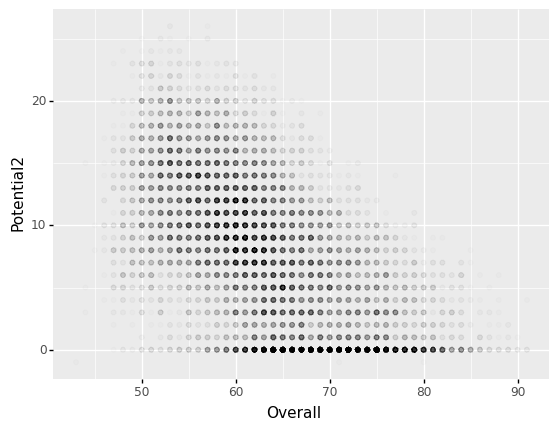

<ggplot: (8772307230189)>

In [37]:
ggplot(data=df.eval('Potential2 = Potential - Overall'))\
+ geom_point(aes(x='Overall',y='Potential2'),alpha=0.01)

`-` 일부점들이 겹치므로 position = 'jitter'를 사용하여 점들을 흩뿌리자. 

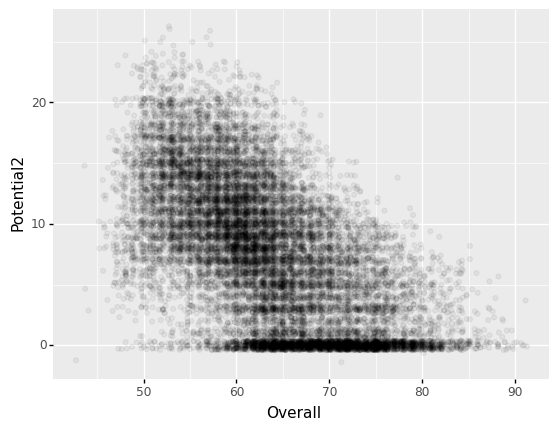

<ggplot: (8772275596573)>

In [38]:
ggplot(data=df.eval('Potential2 = Potential - Overall'))\
+ geom_point(aes(x='Overall',y='Potential2'),alpha=0.05,position='jitter')

`-` 해석
- 해석1: Overall, Potential2는 음의 상관관계가 있다. 
- 해석2: 0근처에 데이터가 많음 $\to$ 이미 은퇴한 선수들이 아닐까? 
- 해석3: Overall의 값이 작을수록 Potential2의 분산이 크다. 

`-` 은퇴한 선수들은 제외하고 시각화하자. 

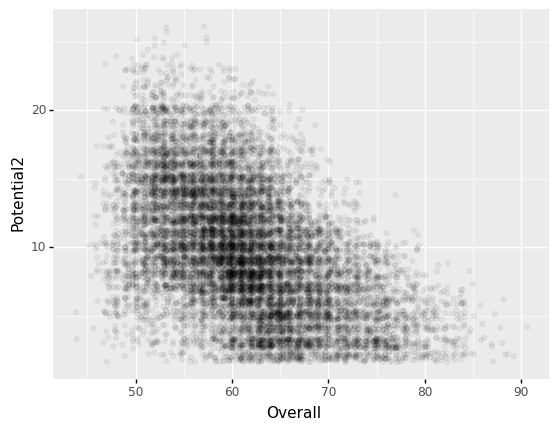

<ggplot: (8772275556513)>

In [39]:
ggplot(data=df.eval('Potential2 = Potential - Overall').query('Potential2 > 1'))\
+ geom_point(aes(x='Overall',y='Potential2'),alpha=0.05,position='jitter')

`-` Overall에 따라서 구간을 나누고 그 구간에 대응하는 boxplot을 그리자. 

In [40]:
df.eval('Potential2 = Potential - Overall').query('Potential2 > 1')\
.Overall.describe()

count    13644.000000
mean        61.415347
std          7.247821
min         44.000000
25%         56.000000
50%         61.000000
75%         66.000000
max         91.000000
Name: Overall, dtype: float64

In [41]:
def f(x):
    if x>66: 
        y='66<'
    elif x>61:
        y='61~66'
    elif x>56:
        y='56~61'
    else:
        y='<56' 
    return y

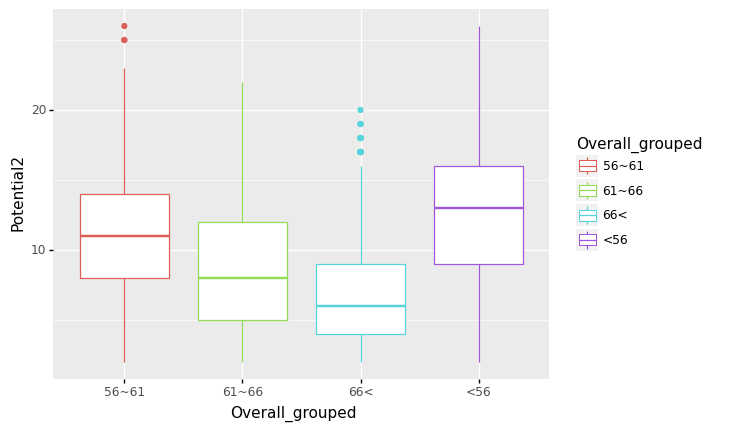

<ggplot: (8772275730901)>

In [42]:
ggplot(data=df.eval('Potential2 = Potential - Overall').query('Potential2 > 1')\
.assign(Overall_grouped= lambda df: list(map(f,df.Overall))))\
    + geom_boxplot(aes(x='Overall_grouped',y='Potential2',color='Overall_grouped'))

- Overall_grouped = "<56" 에 대응하는 점들을 모두 뽑아서 mean(Overall)를 계산하고 그 값을 Overall_grouped = "<56" 에 대응하는 박스플랏의 x축위치로 설정 

- Overall_grouped = "56\~61" 에 대응하는 점들을 모두 뽑아서 mean(Overall)를 계산하고 그 값을 Overall_grouped = "56\~61" 에 대응하는 박스플랏의 x축위치로 설정 

- Overall_grouped = "61\~66" 에 대응하는 점들을 모두 뽑아서 mean(Overall)를 계산하고 그 값을 Overall_grouped = "61\~66" 에 대응하는 박스플랏의 x축위치로 설정 

- Overall_grouped = "66<" 에 대응하는 점들을 모두 뽑아서 mean(Overall)를 계산하고 그 값을 Overall_grouped = "66<" 에 대응하는 박스플랏의 x축위치로 설정 

In [43]:
df.eval('Potential2 = Potential - Overall').query('Potential2 > 1')\
.assign(Overall_grouped= lambda df: list(map(f,df.Overall)))\
.query("Overall_grouped == '66<'").Overall.mean()

71.8127687727423

(방법1)

In [44]:
def g(x):
    if x=='66<': 
        y= 71.8127687727423
    elif x=='61~66':
        y= 63.773918342474104
    elif x=='56~61':
        y= 59.155840684309005
    else:
        y= 52.87743190661479
    return y

In [45]:
df.eval('Potential2 = Potential - Overall').query('Potential2 > 1')\
.assign(Overall_grouped= lambda df: list(map(f,df.Overall)))\
.assign(Overall_x= lambda df: list(map(g,df.Overall_grouped)))

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating,Potential2,Overall_grouped,Overall_x
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,NaN,2026,172cm,68kg,€154.4M,23.0,NaN,3,66<,71.812769
10,228251,L. Pellegrini,26,https://cdn.sofifa.net/players/228/251/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,84,87,Roma,https://cdn.sofifa.net/teams/52/30.png,...,NaN,2026,186cm,77kg,€97.6M,7.0,NaN,3,66<,71.812769
13,225193,Merino,26,https://cdn.sofifa.net/players/225/193/23_60.png,Spain,https://cdn.sofifa.net/flags/es.png,83,86,Real Sociedad,https://cdn.sofifa.net/teams/457/30.png,...,NaN,2025,189cm,83kg,€102.2M,8.0,NaN,3,66<,71.812769
17,228702,F. de Jong,25,https://cdn.sofifa.net/players/228/702/23_60.png,Netherlands,https://cdn.sofifa.net/flags/nl.png,87,92,FC Barcelona,https://cdn.sofifa.net/teams/241/30.png,...,NaN,2026,180cm,74kg,€247.6M,21.0,NaN,5,66<,71.812769
21,231281,T. Alexander-Arnold,23,https://cdn.sofifa.net/players/231/281/23_60.png,England,https://cdn.sofifa.net/flags/gb-eng.png,87,90,Liverpool,https://cdn.sofifa.net/teams/9/30.png,...,NaN,2025,180cm,69kg,€193.5M,66.0,NaN,3,66<,71.812769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,NaN,2027,190cm,78kg,€218K,35.0,NaN,13,<56,52.877432
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,NaN,2026,195cm,84kg,€188K,21.0,NaN,16,<56,52.877432
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,NaN,2023,190cm,82kg,€142K,12.0,NaN,5,<56,52.877432
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,NaN,2021,187cm,79kg,€214K,40.0,NaN,15,<56,52.877432


In [46]:
df2= df.eval('Potential2 = Potential - Overall').query('Potential2 > 1')\
.assign(Overall_grouped= lambda df: list(map(f,df.Overall)))\
.assign(Overall_x= lambda df: list(map(g,df.Overall_grouped)))
df2

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating,Potential2,Overall_grouped,Overall_x
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,NaN,2026,172cm,68kg,€154.4M,23.0,NaN,3,66<,71.812769
10,228251,L. Pellegrini,26,https://cdn.sofifa.net/players/228/251/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,84,87,Roma,https://cdn.sofifa.net/teams/52/30.png,...,NaN,2026,186cm,77kg,€97.6M,7.0,NaN,3,66<,71.812769
13,225193,Merino,26,https://cdn.sofifa.net/players/225/193/23_60.png,Spain,https://cdn.sofifa.net/flags/es.png,83,86,Real Sociedad,https://cdn.sofifa.net/teams/457/30.png,...,NaN,2025,189cm,83kg,€102.2M,8.0,NaN,3,66<,71.812769
17,228702,F. de Jong,25,https://cdn.sofifa.net/players/228/702/23_60.png,Netherlands,https://cdn.sofifa.net/flags/nl.png,87,92,FC Barcelona,https://cdn.sofifa.net/teams/241/30.png,...,NaN,2026,180cm,74kg,€247.6M,21.0,NaN,5,66<,71.812769
21,231281,T. Alexander-Arnold,23,https://cdn.sofifa.net/players/231/281/23_60.png,England,https://cdn.sofifa.net/flags/gb-eng.png,87,90,Liverpool,https://cdn.sofifa.net/teams/9/30.png,...,NaN,2025,180cm,69kg,€193.5M,66.0,NaN,3,66<,71.812769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,NaN,2027,190cm,78kg,€218K,35.0,NaN,13,<56,52.877432
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,NaN,2026,195cm,84kg,€188K,21.0,NaN,16,<56,52.877432
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,NaN,2023,190cm,82kg,€142K,12.0,NaN,5,<56,52.877432
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,NaN,2021,187cm,79kg,€214K,40.0,NaN,15,<56,52.877432


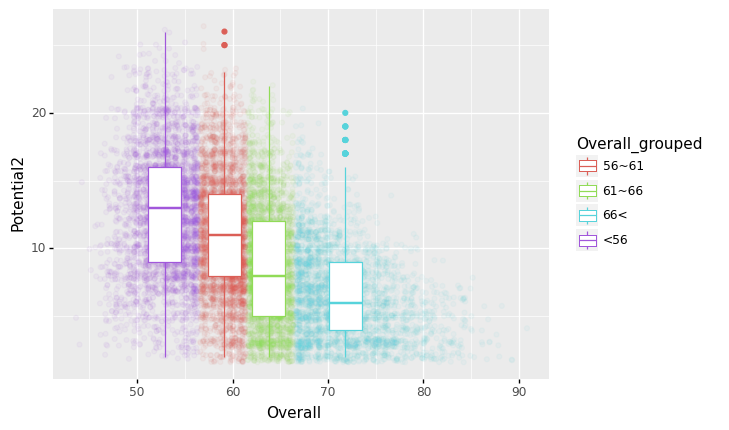

<ggplot: (8772275710537)>

In [47]:
ggplot(data=df2)\
+geom_point(aes(x='Overall',y='Potential2',color='Overall_grouped'),position='jitter',alpha=0.05)\
+geom_boxplot(aes(x='Overall_x',y='Potential2',color='Overall_grouped'))

(방법2)

In [48]:
_df = df.eval('Potential2 = Potential - Overall').query('Potential2 > 1')\
.assign(Overall_grouped= lambda df: list(map(f,df.Overall)))

In [49]:
df3=_df.groupby(by="Overall_grouped").agg({'Overall':np.mean}).reset_index()\
.rename(columns={'Overall':'Overall_x'}).merge(_df)

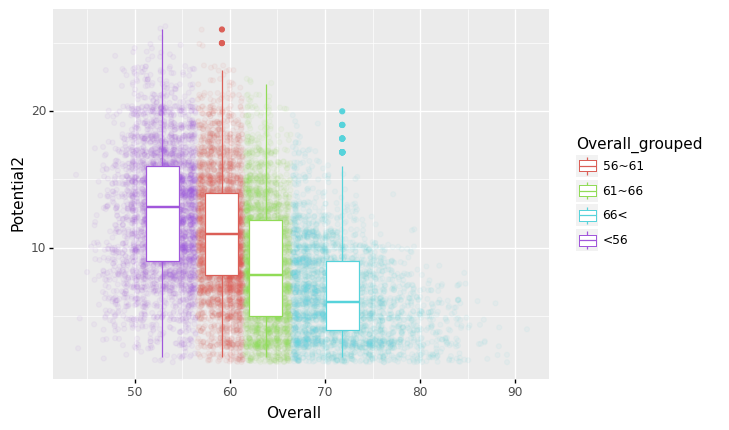

<ggplot: (8772275671993)>

In [50]:
ggplot(data=df3)\
+geom_point(aes(x='Overall',y='Potential2',color='Overall_grouped'),position='jitter',alpha=0.05)\
+geom_boxplot(aes(x='Overall_x',y='Potential2',color='Overall_grouped'))

# 판다스: Groupby 

## flights data

In [51]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58492 entries, 0 to 58491
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      58492 non-null  int64  
 1   DAY        58492 non-null  int64  
 2   WEEKDAY    58492 non-null  int64  
 3   AIRLINE    58492 non-null  object 
 4   ORG_AIR    58492 non-null  object 
 5   DEST_AIR   58492 non-null  object 
 6   SCHED_DEP  58492 non-null  int64  
 7   DEP_DELAY  57659 non-null  float64
 8   AIR_TIME   57474 non-null  float64
 9   DIST       58492 non-null  int64  
 10  SCHED_ARR  58492 non-null  int64  
 11  ARR_DELAY  57474 non-null  float64
 12  DIVERTED   58492 non-null  int64  
 13  CANCELLED  58492 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 6.2+ MB


## get_groups

`-` groupby 
- 데이터프레임을 여러개의 서브데이터프레임으로 나누는 기슨
- 단독으로 쓸 이유는 별로 없다. $\to$ 그룹을 나누고 each 그룹마다 어떠한 "변수"에 "연산"을 하기 위함. 

In [52]:
df.groupby(by="AIRLINE")

- 지금 이것이 항공사별로 데이터프레임이 나누어진 상태임 

`-` 진짜 sub dataframe 으로 나누어져 있는지 확인 

In [53]:
grouped = df.groupby(by="AIRLINE")
grouped.groups.keys()

dict_keys(['AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'MQ', 'NK', 'OO', 'UA', 'US', 'VX', 'WN'])

In [54]:
display(grouped.get_group('AS'))

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
38,1,1,4,AS,PHX,SEA,1505,-2.0,155.0,1107,1702,-3.0,0,0
198,1,2,5,AS,LAX,SEA,2110,5.0,145.0,954,2352,8.0,0,0
241,1,2,5,AS,LAS,PDX,650,-5.0,117.0,763,906,-3.0,0,0
277,1,2,5,AS,ORD,ANC,935,-1.0,402.0,2846,1339,-6.0,0,0
397,1,3,6,AS,LAS,SEA,1300,48.0,137.0,867,1535,47.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58305,12,30,3,AS,LAX,SEA,1325,-2.0,134.0,954,1608,-7.0,0,0
58355,12,31,4,AS,PHX,SEA,1200,-5.0,145.0,1107,1407,-24.0,0,0
58404,12,31,4,AS,SFO,SLC,2110,-2.0,80.0,599,2358,-4.0,0,0
58407,12,31,4,AS,SFO,PDX,645,-2.0,81.0,550,832,-3.0,0,0


In [55]:
#collapse_output
for key in grouped.groups.keys():
    display(grouped.get_group(key))

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
6,1,1,4,AA,DFW,MSY,1250,84.0,64.0,447,1410,83.0,0,0
8,1,1,4,AA,ORD,STL,1845,-5.0,44.0,258,1950,-5.0,0,0
15,1,1,4,AA,DEN,DFW,1445,-6.0,93.0,641,1745,4.0,0,0
26,1,1,4,AA,LAX,AUS,1430,33.0,157.0,1242,1925,41.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58470,12,31,4,AA,DFW,FAT,1020,-3.0,196.0,1313,1156,-2.0,0,0
58475,12,31,4,AA,IAH,CLT,710,1.0,113.0,912,1037,-12.0,0,0
58476,12,31,4,AA,DFW,TPA,1020,-3.0,121.0,929,1340,-6.0,0,0
58479,12,31,4,AA,DFW,ELP,1200,3.0,94.0,551,1250,13.0,0,0


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
38,1,1,4,AS,PHX,SEA,1505,-2.0,155.0,1107,1702,-3.0,0,0
198,1,2,5,AS,LAX,SEA,2110,5.0,145.0,954,2352,8.0,0,0
241,1,2,5,AS,LAS,PDX,650,-5.0,117.0,763,906,-3.0,0,0
277,1,2,5,AS,ORD,ANC,935,-1.0,402.0,2846,1339,-6.0,0,0
397,1,3,6,AS,LAS,SEA,1300,48.0,137.0,867,1535,47.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58305,12,30,3,AS,LAX,SEA,1325,-2.0,134.0,954,1608,-7.0,0,0
58355,12,31,4,AS,PHX,SEA,1200,-5.0,145.0,1107,1407,-24.0,0,0
58404,12,31,4,AS,SFO,SLC,2110,-2.0,80.0,599,2358,-4.0,0,0
58407,12,31,4,AS,SFO,PDX,645,-2.0,81.0,550,832,-3.0,0,0


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
123,1,1,4,B6,LAS,BOS,1230,0.0,246.0,2381,2026,-27.0,0,0
127,1,1,4,B6,LAS,BOS,2359,68.0,247.0,2381,749,46.0,0,0
239,1,2,5,B6,ORD,BOS,540,-8.0,96.0,867,856,-22.0,0,0
333,1,3,6,B6,LAX,FLL,2237,32.0,270.0,2342,619,42.0,0,0
548,1,4,7,B6,SFO,FLL,2307,-4.0,298.0,2583,724,-1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58262,12,30,3,B6,SFO,LGB,1921,-6.0,57.0,354,2038,-14.0,0,0
58301,12,30,3,B6,LAX,JFK,630,4.0,285.0,2475,1445,-6.0,0,0
58425,12,31,4,B6,ORD,SJU,700,239.0,250.0,2072,1335,239.0,0,0
58477,12,31,4,B6,DFW,BOS,1145,12.0,161.0,1562,1608,-14.0,0,0


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
53,1,1,4,DL,LAS,MSP,713,-5.0,156.0,1299,1220,-18.0,0,0
57,1,1,4,DL,MSP,RSW,700,-1.0,169.0,1416,1130,-20.0,0,0
77,1,1,4,DL,LAX,ATL,1130,24.0,217.0,1947,1840,16.0,0,0
79,1,1,4,DL,LAX,CMH,2146,-3.0,223.0,1995,459,-13.0,0,0
85,1,1,4,DL,ATL,OKC,2059,-4.0,116.0,761,2227,-12.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58440,12,31,4,DL,ATL,CVG,1611,-4.0,61.0,373,1736,-6.0,0,0
58448,12,31,4,DL,ATL,SRQ,1610,0.0,61.0,444,1740,-13.0,0,0
58464,12,31,4,DL,LAX,SFO,700,108.0,54.0,337,825,105.0,0,0
58467,12,31,4,DL,ATL,IND,1235,-3.0,63.0,432,1407,-13.0,0,0


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
11,1,1,4,EV,ORD,JAN,1155,6.0,113.0,677,1403,5.0,0,0
13,1,1,4,EV,ORD,CMH,1010,-2.0,46.0,296,1228,-9.0,0,0
29,1,1,4,EV,ORD,IND,1025,-6.0,29.0,177,1228,-19.0,0,0
40,1,1,4,EV,IAH,CLE,1038,-3.0,126.0,1091,1425,-18.0,0,0
69,1,1,4,EV,ATL,RAP,1930,-5.0,181.0,1230,2104,-15.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58445,12,31,4,EV,DFW,TXK,850,-5.0,30.0,181,948,-17.0,0,0
58452,12,31,4,EV,DFW,SHV,1650,-4.0,32.0,190,1746,-12.0,0,0
58459,12,31,4,EV,MSP,ORD,1435,18.0,61.0,334,1609,3.0,0,0
58463,12,31,4,EV,ORD,MSN,1220,18.0,32.0,108,1319,27.0,0,0


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
7,1,1,4,F9,SFO,PHX,1020,-7.0,91.0,651,1315,-6.0,0,0
93,1,1,4,F9,ATL,DEN,859,16.0,181.0,1199,1026,10.0,0,0
209,1,2,5,F9,MSP,DEN,1025,-6.0,97.0,680,1134,-13.0,0,0
232,1,2,5,F9,DEN,PHX,2040,-7.0,83.0,602,2228,-18.0,0,0
247,1,2,5,F9,ORD,ATL,730,10.0,86.0,606,1020,23.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58288,12,30,3,F9,DEN,ORD,625,-4.0,136.0,888,1000,14.0,0,0
58331,12,30,3,F9,ORD,PHX,825,18.0,207.0,1440,1127,14.0,0,0
58447,12,31,4,F9,DEN,LAS,1245,13.0,94.0,628,1340,13.0,0,0
58449,12,31,4,F9,DEN,MCO,645,11.0,169.0,1546,1224,-11.0,0,0


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
582,1,4,7,HA,LAX,OGG,1115,-11.0,310.0,2486,1500,-27.0,0,0
712,1,5,1,HA,LAS,HNL,900,-5.0,357.0,2762,1315,5.0,0,0
878,1,6,2,HA,PHX,HNL,800,1.0,374.0,2917,1140,3.0,0,0
1053,1,7,3,HA,LAX,HNL,1705,0.0,332.0,2556,2055,-2.0,0,0
1269,1,8,4,HA,LAX,HNL,1000,-1.0,335.0,2556,1350,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55883,12,16,3,HA,LAX,HNL,835,1.0,314.0,2556,1235,-18.0,0,0
56174,12,18,5,HA,LAX,HNL,835,-5.0,342.0,2556,1235,-4.0,0,0
56350,12,19,6,HA,PHX,HNL,800,-5.0,363.0,2917,1155,-34.0,0,0
56816,12,21,1,HA,LAX,LIH,740,20.0,303.0,2615,1145,-11.0,0,0


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
10,1,1,4,MQ,DFW,DRO,1335,28.0,104.0,674,1438,28.0,0,0
18,1,1,4,MQ,ORD,DAY,2220,19.0,37.0,240,23,20.0,0,0
24,1,1,4,MQ,DFW,BTR,730,NaN,NaN,383,853,NaN,0,1
50,1,1,4,MQ,ORD,CID,1135,-7.0,37.0,196,1238,-15.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58415,12,31,4,MQ,ORD,FWA,845,-2.0,37.0,157,1045,-4.0,0,0
58426,12,31,4,MQ,DFW,FAR,1154,4.0,124.0,968,1437,-13.0,0,0
58468,12,31,4,MQ,DFW,OKC,1720,-3.0,31.0,175,1819,-10.0,0,0
58474,12,31,4,MQ,ORD,FNT,829,4.0,40.0,223,1034,-4.0,0,0


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
17,1,1,4,NK,DEN,DTW,1952,37.0,124.0,1123,31,54.0,0,0
74,1,1,4,NK,PHX,DFW,159,-1.0,103.0,868,502,1.0,0,0
95,1,1,4,NK,LAS,OAK,1115,22.0,62.0,407,1246,10.0,0,0
109,1,1,4,NK,MSP,ORD,616,2.0,49.0,334,745,-19.0,0,0
166,1,2,5,NK,LAS,PDX,1535,-8.0,123.0,763,1754,-4.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58160,12,29,2,NK,MSP,MCO,740,0.0,171.0,1310,1158,33.0,0,0
58197,12,30,3,NK,IAH,ORD,755,-8.0,136.0,925,1030,-2.0,0,0
58437,12,31,4,NK,ORD,DFW,1952,15.0,135.0,802,2225,23.0,0,0
58461,12,31,4,NK,ORD,LGA,1801,-5.0,84.0,733,2109,-26.0,0,0


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
12,1,1,4,OO,ORD,MSP,1510,2.0,65.0,334,1646,4.0,0,0
16,1,1,4,OO,DEN,SGU,1105,21.0,66.0,517,1249,20.0,0,0
22,1,1,4,OO,LAS,LAX,1544,-4.0,39.0,236,1655,-12.0,0,0
25,1,1,4,OO,ORD,SPI,2110,-4.0,31.0,174,2205,5.0,0,0
27,1,1,4,OO,IAH,JAC,1104,-1.0,161.0,1265,1316,-1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58451,12,31,4,OO,ATL,FWA,1905,-3.0,72.0,508,2051,-14.0,0,0
58480,12,31,4,OO,MSP,BIS,1310,-2.0,65.0,386,1449,-9.0,0,0
58482,12,31,4,OO,DEN,CPR,1850,-2.0,38.0,230,1956,1.0,0,0
58489,12,31,4,OO,SFO,SBA,1846,-6.0,46.0,262,1956,-5.0,0,0


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
5,1,1,4,UA,IAH,SAN,1450,1.0,178.0,1303,1620,-14.0,0,0
9,1,1,4,UA,IAH,SJC,925,3.0,215.0,1608,1136,-14.0,0,0
14,1,1,4,UA,IAH,IND,1426,-1.0,102.0,844,1742,-20.0,0,0
21,1,1,4,UA,ORD,CLE,2102,48.0,47.0,315,2320,41.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58422,12,31,4,UA,DEN,SAN,1535,0.0,124.0,853,1704,-13.0,0,0
58432,12,31,4,UA,ORD,SAN,1915,7.0,238.0,1723,2143,-3.0,0,0
58457,12,31,4,UA,ORD,LAX,659,-1.0,241.0,1744,946,0.0,0,0
58460,12,31,4,UA,SFO,PHL,2235,-6.0,265.0,2521,700,-42.0,0,0


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
31,1,1,4,US,PHX,DEN,1810,29.0,94.0,602,1954,49.0,0,0
35,1,1,4,US,ORD,PHL,1600,-2.0,80.0,678,1857,-9.0,0,0
49,1,1,4,US,IAH,PHX,1445,-1.0,147.0,1009,1638,-7.0,0,0
96,1,1,4,US,ATL,PHL,1445,-4.0,90.0,666,1644,-11.0,0,0
104,1,1,4,US,MSP,PHX,730,-3.0,174.0,1276,1010,-20.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31514,6,30,2,US,DEN,PHL,705,-4.0,188.0,1558,1240,1.0,0,0
31523,6,30,2,US,PHX,DEN,1451,6.0,85.0,602,1738,7.0,0,0
31535,6,30,2,US,PHX,AUS,840,-3.0,116.0,872,1304,-11.0,0,0
31561,6,30,2,US,ORD,PHX,710,-5.0,170.0,1440,901,-50.0,0,0


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
56,1,1,4,VX,LAS,SFO,900,23.0,65.0,414,1035,11.0,0,0
227,1,2,5,VX,SFO,LAS,1220,-5.0,68.0,414,1350,-5.0,0,0
243,1,2,5,VX,SFO,SEA,700,-4.0,104.0,679,905,-1.0,0,0
417,1,3,6,VX,SFO,LAS,900,-2.0,62.0,414,1030,-11.0,0,0
432,1,3,6,VX,SFO,SEA,2035,-2.0,106.0,679,2240,-2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58332,12,30,3,VX,SFO,LAS,1950,-3.0,58.0,414,2120,-4.0,0,0
58383,12,31,4,VX,SFO,PSP,1630,-7.0,65.0,421,1755,-12.0,0,0
58400,12,31,4,VX,SFO,LAX,1125,-4.0,54.0,337,1245,-10.0,0,0
58471,12,31,4,VX,SFO,LAX,700,6.0,51.0,337,820,3.0,0,0


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0
19,1,1,4,WN,PHX,LAX,1640,51.0,58.0,370,1700,59.0,0,0
20,1,1,4,WN,ATL,BWI,1115,1.0,76.0,577,1305,-15.0,0,0
23,1,1,4,WN,ATL,HOU,1555,30.0,113.0,696,1720,18.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58455,12,31,4,WN,LAX,SMF,1420,-2.0,64.0,373,1540,-7.0,0,0
58458,12,31,4,WN,LAS,SFO,1825,25.0,67.0,414,1955,17.0,0,0
58472,12,31,4,WN,PHX,HOU,845,5.0,119.0,1020,1210,7.0,0,0
58473,12,31,4,WN,DEN,PDX,1205,4.0,130.0,991,1400,-13.0,0,0


## 범주형변수를 기준으로 groupby -> agg 

### `#` EX1: [AIRLINE] $\to$ {ARR_DELAY:mean}

`-` 방법1: grouby() $\to$ .agg({colname: function})

(예시1)

In [56]:
df.groupby(by="AIRLINE").agg({'ARR_DELAY':np.mean})

,ARR_DELAY
AIRLINE,
AA,5.542661
AS,-0.833333
B6,8.692593
DL,0.339691
EV,7.034580
F9,13.630651
HA,4.972973
MQ,6.860591
NK,18.436070


(예시2)

In [57]:
df.groupby(by="AIRLINE").agg({'ARR_DELAY':'mean'})

,ARR_DELAY
AIRLINE,
AA,5.542661
AS,-0.833333
B6,8.692593
DL,0.339691
EV,7.034580
F9,13.630651
HA,4.972973
MQ,6.860591
NK,18.436070


`-` 방법2: grouby() $\to$ key로 column선택 $\to$ .agg(f) or .f()

(예시1)

In [58]:
df.groupby(by='AIRLINE')['ARR_DELAY'].agg(np.mean)

AIRLINE
AA     5.542661
AS    -0.833333
B6     8.692593
DL     0.339691
EV     7.034580
F9    13.630651
HA     4.972973
MQ     6.860591
NK    18.436070
OO     7.593463
UA     7.765755
US     1.681105
VX     5.348884
WN     6.397353
Name: ARR_DELAY, dtype: float64

(예시2)

In [59]:
df.groupby(by='AIRLINE')['ARR_DELAY'].agg("mean")

AIRLINE
AA     5.542661
AS    -0.833333
B6     8.692593
DL     0.339691
EV     7.034580
F9    13.630651
HA     4.972973
MQ     6.860591
NK    18.436070
OO     7.593463
UA     7.765755
US     1.681105
VX     5.348884
WN     6.397353
Name: ARR_DELAY, dtype: float64

(예시3)

In [60]:
df.groupby(by='AIRLINE')['ARR_DELAY'].mean()

AIRLINE
AA     5.542661
AS    -0.833333
B6     8.692593
DL     0.339691
EV     7.034580
F9    13.630651
HA     4.972973
MQ     6.860591
NK    18.436070
OO     7.593463
UA     7.765755
US     1.681105
VX     5.348884
WN     6.397353
Name: ARR_DELAY, dtype: float64

### `#` EX2: [AIRLINE,WEEKDAY] $\to$ {CANCELLED:sum}

`-` 방법1

(예시1)

In [61]:
df.groupby(by=["AIRLINE","WEEKDAY"]).agg({"CANCELLED":np.sum})

CANCELLED
AIRLINE WEEKDAY           
AA      1               41
        2                9
        3               16
        4               20
        5               18
...                    ...
WN      3               18
        4               10
        5                7
        6               10
        7                7

[98 rows x 1 columns]

(예시2)

In [62]:
df.groupby(by=["AIRLINE","WEEKDAY"]).agg({"CANCELLED":"sum"})

CANCELLED
AIRLINE WEEKDAY           
AA      1               41
        2                9
        3               16
        4               20
        5               18
...                    ...
WN      3               18
        4               10
        5                7
        6               10
        7                7

[98 rows x 1 columns]

`-` 방법2

(예시1)

In [63]:
df.groupby(by=["AIRLINE","WEEKDAY"])[["CANCELLED"]].agg(np.sum)

CANCELLED
AIRLINE WEEKDAY           
AA      1               41
        2                9
        3               16
        4               20
        5               18
...                    ...
WN      3               18
        4               10
        5                7
        6               10
        7                7

[98 rows x 1 columns]

(예시2)

In [64]:
df.groupby(by=["AIRLINE","WEEKDAY"])["CANCELLED"].agg("sum")

AIRLINE  WEEKDAY
AA       1          41
         2           9
         3          16
         4          20
         5          18
                    ..
WN       3          18
         4          10
         5           7
         6          10
         7           7
Name: CANCELLED, Length: 98, dtype: int64

(예시3)

In [65]:
df.groupby(by=["AIRLINE","WEEKDAY"])["CANCELLED"].sum()

AIRLINE  WEEKDAY
AA       1          41
         2           9
         3          16
         4          20
         5          18
                    ..
WN       3          18
         4          10
         5           7
         6          10
         7           7
Name: CANCELLED, Length: 98, dtype: int64

In [66]:
df.DIVERTED

0        0
1        0
2        0
3        0
4        0
        ..
58487    0
58488    0
58489    0
58490    0
58491    0
Name: DIVERTED, Length: 58492, dtype: int64

### `#` EX3: [AIRLINE,WEEKDAY] $\to$ {CANCELLED:sum,mean}, {DIVERTED: sum,mean} 

`-` 방법1

(예시1)

In [67]:
df.groupby(["AIRLINE","WEEKDAY"])\
.agg({"CANCELLED":[np.sum,np.mean],"DIVERTED":[np.sum,np.mean]})

CANCELLED           DIVERTED          
                      sum      mean      sum      mean
AIRLINE WEEKDAY                                       
AA      1              41  0.032106        6  0.004699
        2               9  0.007341        2  0.001631
        3              16  0.011949        2  0.001494
        4              20  0.015004        5  0.003751
        5              18  0.014151        1  0.000786
...                   ...       ...      ...       ...
WN      3              18  0.014118        2  0.001569
        4              10  0.007911        4  0.003165
        5               7  0.005828        0  0.000000
        6              10  0.010132        3  0.003040
        7               7  0.006066        3  0.002600

[98 rows x 4 columns]

(예시2)

In [68]:
df.groupby(["AIRLINE","WEEKDAY"])\
.agg({"CANCELLED":["sum","mean"],"DIVERTED":["sum","mean"]})

CANCELLED           DIVERTED          
                      sum      mean      sum      mean
AIRLINE WEEKDAY                                       
AA      1              41  0.032106        6  0.004699
        2               9  0.007341        2  0.001631
        3              16  0.011949        2  0.001494
        4              20  0.015004        5  0.003751
        5              18  0.014151        1  0.000786
...                   ...       ...      ...       ...
WN      3              18  0.014118        2  0.001569
        4              10  0.007911        4  0.003165
        5               7  0.005828        0  0.000000
        6              10  0.010132        3  0.003040
        7               7  0.006066        3  0.002600

[98 rows x 4 columns]

`-` 방법2

(예시1)

In [69]:
df.groupby(["AIRLINE","WEEKDAY"])[["CANCELLED","DIVERTED"]]\
.agg([np.sum,np.mean])

CANCELLED           DIVERTED          
                      sum      mean      sum      mean
AIRLINE WEEKDAY                                       
AA      1              41  0.032106        6  0.004699
        2               9  0.007341        2  0.001631
        3              16  0.011949        2  0.001494
        4              20  0.015004        5  0.003751
        5              18  0.014151        1  0.000786
...                   ...       ...      ...       ...
WN      3              18  0.014118        2  0.001569
        4              10  0.007911        4  0.003165
        5               7  0.005828        0  0.000000
        6              10  0.010132        3  0.003040
        7               7  0.006066        3  0.002600

[98 rows x 4 columns]

(예시2)

In [70]:
df.groupby(["AIRLINE","WEEKDAY"])[["CANCELLED","DIVERTED"]]\
.agg(["sum","mean"])

CANCELLED           DIVERTED          
                      sum      mean      sum      mean
AIRLINE WEEKDAY                                       
AA      1              41  0.032106        6  0.004699
        2               9  0.007341        2  0.001631
        3              16  0.011949        2  0.001494
        4              20  0.015004        5  0.003751
        5              18  0.014151        1  0.000786
...                   ...       ...      ...       ...
WN      3              18  0.014118        2  0.001569
        4              10  0.007911        4  0.003165
        5               7  0.005828        0  0.000000
        6              10  0.010132        3  0.003040
        7               7  0.006066        3  0.002600

[98 rows x 4 columns]

(예시3) -- 사용불가능 

### `#` EX4: [AIRLINE,WEEKDAY] $\to$ {CANCELLED:sum,mean,count}, {AIR_TIME: mean,var} 

`-` 방법1

(예시1)

In [71]:
df.groupby(["AIRLINE","WEEKDAY"])\
.agg({'CANCELLED':[np.sum,np.mean,len],'AIR_TIME':[np.mean,np.var]})

CANCELLED                    AIR_TIME             
                      sum      mean   len        mean          var
AIRLINE WEEKDAY                                                   
AA      1              41  0.032106  1277  147.610569  5393.806723
        2               9  0.007341  1226  143.851852  5359.890719
        3              16  0.011949  1339  144.514005  5378.854539
        4              20  0.015004  1333  141.124618  4791.524627
        5              18  0.014151  1272  145.430966  5884.592076
...                   ...       ...   ...         ...          ...
WN      3              18  0.014118  1275  104.219920  2901.873447
        4              10  0.007911  1264  107.200800  2966.568935
        5               7  0.005828  1201  107.893635  3268.717093
        6              10  0.010132   987  109.247433  3152.753719
        7               7  0.006066  1154  107.602273  3183.126889

[98 rows x 5 columns]

(예시2)

In [72]:
df.groupby(["AIRLINE","WEEKDAY"])\
.agg({'CANCELLED':["sum","mean","count"],'AIR_TIME':["mean","var"]})

CANCELLED                    AIR_TIME             
                      sum      mean count        mean          var
AIRLINE WEEKDAY                                                   
AA      1              41  0.032106  1277  147.610569  5393.806723
        2               9  0.007341  1226  143.851852  5359.890719
        3              16  0.011949  1339  144.514005  5378.854539
        4              20  0.015004  1333  141.124618  4791.524627
        5              18  0.014151  1272  145.430966  5884.592076
...                   ...       ...   ...         ...          ...
WN      3              18  0.014118  1275  104.219920  2901.873447
        4              10  0.007911  1264  107.200800  2966.568935
        5               7  0.005828  1201  107.893635  3268.717093
        6              10  0.010132   987  109.247433  3152.753719
        7               7  0.006066  1154  107.602273  3183.126889

[98 rows x 5 columns]

(사용자정의함수)

In [73]:
df.groupby(["AIRLINE","WEEKDAY"])\
.agg({'CANCELLED':[np.sum,np.mean,len],
      'AIR_TIME':[np.mean,lambda x: np.std(x,ddof=1)**2]})

CANCELLED                    AIR_TIME             
                      sum      mean   len        mean   <lambda_0>
AIRLINE WEEKDAY                                                   
AA      1              41  0.032106  1277  147.610569  5393.806723
        2               9  0.007341  1226  143.851852  5359.890719
        3              16  0.011949  1339  144.514005  5378.854539
        4              20  0.015004  1333  141.124618  4791.524627
        5              18  0.014151  1272  145.430966  5884.592076
...                   ...       ...   ...         ...          ...
WN      3              18  0.014118  1275  104.219920  2901.873447
        4              10  0.007911  1264  107.200800  2966.568935
        5               7  0.005828  1201  107.893635  3268.717093
        6              10  0.010132   987  109.247433  3152.753719
        7               7  0.006066  1154  107.602273  3183.126889

[98 rows x 5 columns]

## 연속형변수를 기준으로 groupby -> agg 

In [74]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,58482,58483,58484,58485,58486,58487,58488,58489,58490,58491
MONTH,1,1,1,1,1,1,1,1,1,1,...,12,12,12,12,12,12,12,12,12,12
DAY,1,1,1,1,1,1,1,1,1,1,...,31,31,31,31,31,31,31,31,31,31
WEEKDAY,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
AIRLINE,WN,UA,MQ,AA,WN,UA,AA,F9,AA,UA,...,OO,B6,MQ,DL,EV,AA,F9,OO,WN,OO
ORG_AIR,LAX,DEN,DFW,DFW,LAX,IAH,DFW,SFO,ORD,IAH,...,DEN,PHX,ORD,ATL,DFW,SFO,LAS,SFO,MSP,SFO
DEST_AIR,SLC,IAD,VPS,DCA,MCI,SAN,MSY,PHX,STL,SJC,...,CPR,BOS,DSM,CMH,LFT,DFW,SFO,SBA,ATL,BOI
SCHED_DEP,1625,823,1305,1555,1720,1450,1250,1020,1845,925,...,1850,2236,1333,2206,850,515,1910,1846,525,859
DEP_DELAY,58.0,7.0,36.0,7.0,48.0,1.0,84.0,-7.0,-5.0,3.0,...,-2.0,-12.0,1.0,2.0,21.0,5.0,13.0,-6.0,39.0,5.0
AIR_TIME,94.0,154.0,85.0,126.0,166.0,178.0,64.0,91.0,44.0,215.0,...,38.0,231.0,57.0,64.0,52.0,166.0,71.0,46.0,124.0,73.0
DIST,590,1452,641,1192,1363,1303,447,651,258,1608,...,230,2300,299,447,351,1464,414,262,907,522


In [75]:
df.DIST.describe()

count    58492.000000
mean       872.900072
std        624.996805
min         67.000000
25%        391.000000
50%        690.000000
75%       1199.000000
max       4502.000000
Name: DIST, dtype: float64

In [76]:
df.assign(DIST2 = pd.cut(df.DIST,[-np.inf,391,690,1199,np.inf]))\
.groupby(["AIRLINE","DIST2"]).agg({'CANCELLED':["sum","mean","count"]})

CANCELLED                
                              sum      mean count
AIRLINE DIST2                                    
AA      (-inf, 391.0]          18  0.015986  1126
        (391.0, 690.0]         17  0.013589  1251
        (690.0, 1199.0]        69  0.022066  3127
        (1199.0, inf]          50  0.014723  3396
AS      (-inf, 391.0]           0       NaN     0
        (391.0, 690.0]          0  0.000000   145
        (690.0, 1199.0]         0  0.000000   462
        (1199.0, inf]           0  0.000000   161
B6      (-inf, 391.0]           0  0.000000    71
        (391.0, 690.0]          0  0.000000    38
        (690.0, 1199.0]         0  0.000000    61
        (1199.0, inf]           1  0.002681   373
DL      (-inf, 391.0]           7  0.003086  2268
        (391.0, 690.0]          8  0.002421  3304
        (690.0, 1199.0]        16  0.006405  2498
        (1199.0, inf]           7  0.002766  2531
EV      (-inf, 391.0]          77  0.028785  2675
        (391.0, 690.0]         47  0.022793  2062
        (690.0, 1199.0]        22  0.019982  1101
        (1199.0, inf]           0  0.000000    20
F9      (-inf, 391.0]           0  0.000000    27
        (391.0, 690.0]          6  0.013825   434
        (690.0, 1199.0]         4  0.007105   563
        (1199.0, inf]           0  0.000000   293
HA      (-inf, 391.0]           0       NaN     0
        (391.0, 690.0]          0       NaN     0
        (690.0, 1199.0]         0       NaN     0
        (1199.0, inf]           0  0.000000   112
MQ      (-inf, 391.0]          90  0.047120  1910
        (391.0, 690.0]         39  0.037356  1044
        (690.0, 1199.0]        22  0.044266   497
        (1199.0, inf]           1  0.050000    20
NK      (-inf, 391.0]           5  0.036496   137
        (391.0, 690.0]          4  0.013201   303
        (690.0, 1199.0]         6  0.011029   544
        (1199.0, inf]          10  0.018797   532
OO      (-inf, 391.0]          75  0.024826  3021
        (391.0, 690.0]         39  0.019364  2014
        (690.0, 1199.0]        19  0.016351  1162
        (1199.0, inf]           9  0.023018   391
UA      (-inf, 391.0]           5  0.007143   700
        (391.0, 690.0]         14  0.011824  1184
        (690.0, 1199.0]        26  0.010924  2380
        (1199.0, inf]          48  0.013605  3528
US      (-inf, 391.0]           0  0.000000   254
        (391.0, 690.0]          7  0.021944   319
        (690.0, 1199.0]         2  0.006329   316
        (1199.0, inf]          12  0.016529   726
VX      (-inf, 391.0]           2  0.008299   241
        (391.0, 690.0]          1  0.003861   259
        (690.0, 1199.0]         0  0.000000    22
        (1199.0, inf]           3  0.006369   471
WN      (-inf, 391.0]          55  0.023810  2310
        (391.0, 690.0]         14  0.006487  2158
        (690.0, 1199.0]        17  0.007896  2153
        (1199.0, inf]           7  0.003895  1797

In [77]:
pd.cut(df.DIST,[-np.inf,400,700,1200,np.inf],labels=['~400','400~700','700~1200','1200~'])

0         400~700
1           1200~
2         400~700
3        700~1200
4           1200~
           ...   
58487       1200~
58488     400~700
58489        ~400
58490    700~1200
58491     400~700
Name: DIST, Length: 58492, dtype: category
Categories (4, object): ['~400' < '400~700' < '700~1200' < '1200~']

In [78]:
df.assign(DIST2 = pd.cut(df.DIST,[-np.inf,400,700,1200,np.inf],labels=['~400','400~700','700~1200','1200~']))\
.groupby(["AIRLINE","DIST2"]).agg({'CANCELLED':["sum","mean","count"]})

CANCELLED                
                       sum      mean count
AIRLINE DIST2                             
AA      ~400            18  0.015986  1126
        400~700         17  0.013589  1251
        700~1200        69  0.022066  3127
        1200~           50  0.014723  3396
AS      ~400             0       NaN     0
        400~700          0  0.000000   145
        700~1200         0  0.000000   462
        1200~            0  0.000000   161
B6      ~400             0  0.000000    71
        400~700          0  0.000000    38
        700~1200         0  0.000000    61
        1200~            1  0.002681   373
DL      ~400             7  0.003040  2303
        400~700          8  0.002352  3402
        700~1200        16  0.006765  2365
        1200~            7  0.002766  2531
EV      ~400            77  0.027838  2766
        400~700         48  0.023312  2059
        700~1200        21  0.020731  1013
        1200~            0  0.000000    20
F9      ~400             0  0.000000    27
        400~700          7  0.015837   442
        700~1200         3  0.005405   555
        1200~            0  0.000000   293
HA      ~400             0       NaN     0
        400~700          0       NaN     0
        700~1200         0       NaN     0
        1200~            0  0.000000   112
MQ      ~400            92  0.047472  1938
        400~700         39  0.035682  1093
        700~1200        20  0.047619   420
        1200~            1  0.050000    20
NK      ~400             5  0.036496   137
        400~700          4  0.013201   303
        700~1200         6  0.011029   544
        1200~           10  0.018797   532
OO      ~400            76  0.024837  3060
        400~700         38  0.018673  2035
        700~1200        19  0.017241  1102
        1200~            9  0.023018   391
UA      ~400             5  0.006993   715
        400~700         14  0.011966  1170
        700~1200        26  0.010929  2379
        1200~           48  0.013605  3528
US      ~400             0  0.000000   254
        400~700          7  0.021944   319
        700~1200         2  0.006329   316
        1200~           12  0.016529   726
VX      ~400             2  0.008299   241
        400~700          1  0.003861   259
        700~1200         0  0.000000    22
        1200~            3  0.006369   471
WN      ~400            55  0.023022  2389
        400~700         17  0.007795  2181
        700~1200        14  0.006826  2051
        1200~            7  0.003895  1797